### CRISP-DM Data Science Process
This notebook follows the CRISP-DM methodology for analyzing the Stack Overflow 2024 survey dataset.

### Section 1. Business Understanding
#### Objective:
The goal is to analyze the Stack Overflow 2024 survey dataset to gain insights into developer demographics, technology preferences, and career trends.
Some important questions to be answered are:
1. What is the distribution of respondents' ages?
2. What are top countries of the respndents? what are the top 10 countries with the highest percentage of remote workers?
3. What is the distribution of respondent's education level? Is there any correlation between education level and age of respondents?
4. What is the % of workers working in roles related to data science?
5. What is the most Common Employment Status Among Developers?
6. What is the distribution of coding experience (in years) among survey respondents?
7. What are the most common ways developers learn to code?
8. What are the common languages used for coding and which language will they like to learn?
9. What are the top most common developer roles and employment type?
10. How many developers are engaged in any coding activity outside of work? What are the most common coding activities developers engage in outside of work?
11. How does work experience (WorkExp) correlate with job roles (DevType)?
12. How does formal education level (EdLevel) correlate with coding experience (YearsCode)?
13. What are the most common job roles among developers in different industries? What is the distribution of data-related job roles among developers in different industries?

### Section 2. Data Understanding
#### Dataset Overview:
We begin by loading the dataset and performing an initial exploration.

#### Import necessary libraries

In [30]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Gather Data

In [83]:
# importing the survey dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\survey.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [9]:
# import the schema dataset
schema_df = pd.read_csv(r"C:\Users\hp\Desktop\schema.csv")
schema_df.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [20]:
# selected features to focus on for this analysis
selected_columns = ['ResponseId', 
                    'MainBranch', 
                    'Age', 
                    'Employment', 
                    'RemoteWork', 
                    'Check', 
                    'CodingActivities', 
                    'EdLevel', 
                    'LearnCode', 
                    'LearnCodeOnline', 
                    'YearsCode', 
                    'DevType', 
                    'Country', 
                    'LanguageHaveWorkedWith', 
                    'LanguageWantToWorkWith', 
                    'DatabaseHaveWorkedWith', 
                    'PlatformHaveWorkedWith', 
                    'NEWSOSites',
                    'WorkExp',
                    'Industry'
                   ]

In [22]:
survey_df = df[selected_columns].copy()
# schema = schema_df[selected_columns]

#### Assess data to understand data

In [23]:
# checking the number of columns and rows of the dataset
survey_df.shape

(65437, 20)

In [24]:
# getting more information about the dataset
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              65437 non-null  int64  
 1   MainBranch              65437 non-null  object 
 2   Age                     65437 non-null  object 
 3   Employment              65437 non-null  object 
 4   RemoteWork              54806 non-null  object 
 5   Check                   65437 non-null  object 
 6   CodingActivities        54466 non-null  object 
 7   EdLevel                 60784 non-null  object 
 8   LearnCode               60488 non-null  object 
 9   LearnCodeOnline         49237 non-null  object 
 10  YearsCode               59869 non-null  object 
 11  DevType                 59445 non-null  object 
 12  Country                 58930 non-null  object 
 13  LanguageHaveWorkedWith  59745 non-null  object 
 14  LanguageWantToWorkWith  55752 non-null

**There are no missing values in the dataset but we need to clean the 'YearsCode' and 'WorkExp' feature by converting them to numeric data types**

In [26]:
survey_df.describe()

,ResponseId,YearsCode,WorkExp
count,65437.000000,59046.000000,29658.000000
mean,32719.000000,14.175998,11.466957
std,18890.179119,10.361047,9.168709
min,1.000000,1.000000,0.000000
25%,16360.000000,6.000000,4.000000
50%,32719.000000,11.000000,9.000000
75%,49078.000000,20.000000,16.000000
max,65437.000000,50.000000,50.000000


### Section 3. Data Preparation

#### Data Cleaning

In [25]:
# converting the data type of these 2 features to numeric
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['WorkExp'] = pd.to_numeric(survey_df.WorkExp, errors='coerce')

### Section 4 - Evaluation and data analysis ###

### Q1 - Which age group are more interested in the developer industry?

In [28]:
# checking the unique value and count of the age features
survey_df.Age.value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

**The data shows that the largest group of respondents (23,911) is between 25 and 34 years old. This suggests that the survey population is heavily skewed towards young to early-middle career professionals. The number of respondents decreases with each older age group, indicating a smaller representation of older developers and programmers in this dataset. There are very few respondents who are under 18 or over 64.**

### For further clarity of these findings, we can vizualize the age distribution using a barchart

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\88803328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_count.values, y=age_count.index, palette='viridis')


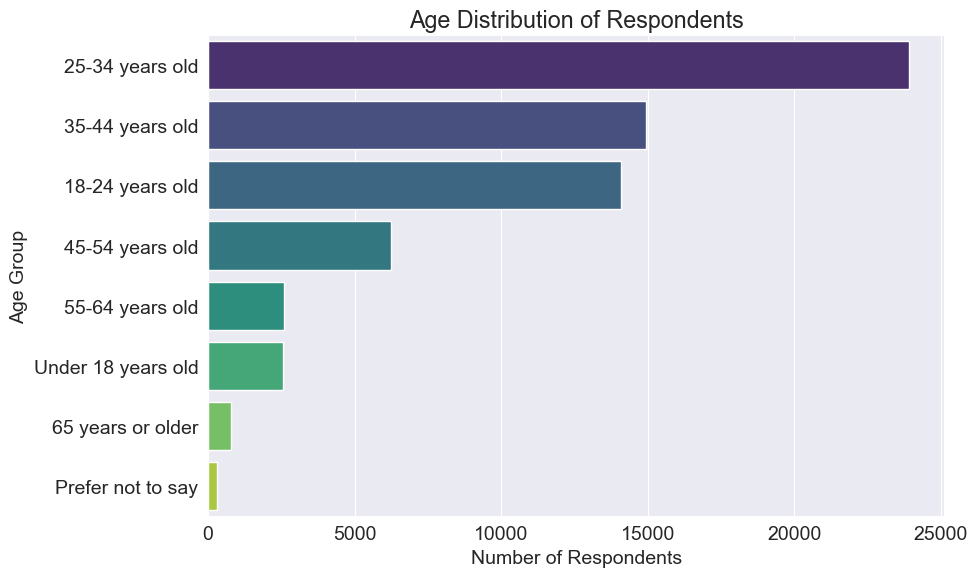

In [130]:
# What is the distribution of respondents' ages?
age_count = survey_df.Age.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_count.values, y=age_count.index, palette='viridis')

plt.title("Age Distribution of Respondents")
plt.xlabel("Number of Respondents")
plt.ylabel("Age Group")

# Save the plot as a PNG image to the desktop (replace with the correct path to your desktop)
plt.savefig("C:/Users/hp/Desktop/age_distribution.png")

plt.tight_layout()
plt.show();

In [32]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Q2 - What insight can we get from the respondent's country?

In [33]:
# checking the total number of countries of respondents
survey_df.Country.nunique()

185

In [34]:
# top countries of the respndents
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                                   1016
Russian Federation                                        925
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\3290894177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries, palette='husl')


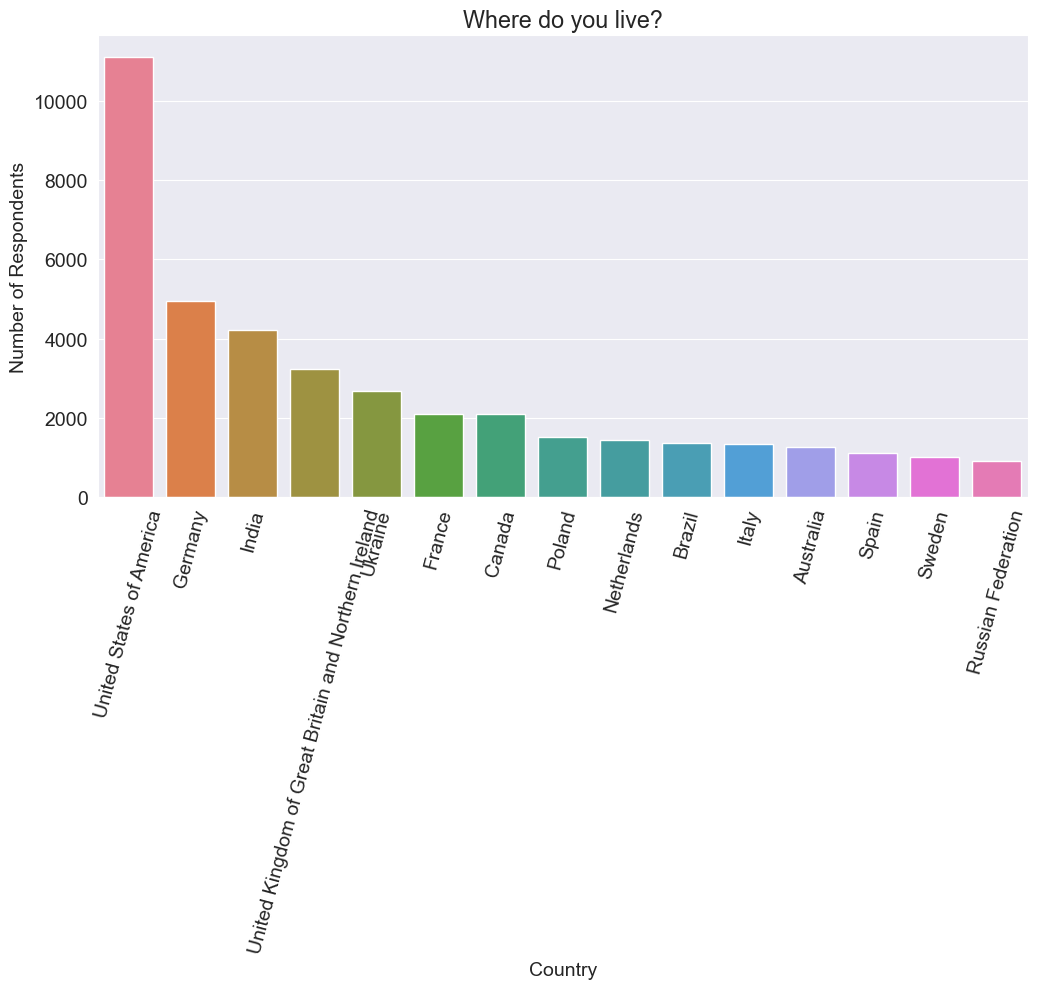

In [40]:
# visualize the top respondent's country

plt.figure(figsize=(12, 6))  # Set figure size
sns.set_color_codes("muted")  # Set color codes (optional)

# Create the bar plot directly with 'husl' palette
sns.barplot(x=top_countries.index, y=top_countries, palette='husl')

plt.xticks(rotation=75)  # Rotate x-axis labels for readability
plt.title("Where do you live?")  # Set title

plt.xlabel("Country")  # Add x-axis label
plt.ylabel("Number of Respondents") # Add y-axis label

plt.show();

**The United States has the highest number of respondents (11,095), significantly more than any other country. Germany comes in second with 4,947 respondents, followed by India with 4,231. The top three countries represent a large portion of the survey participants.  The remaining countries in the top 15 have a decreasing number of respondents, with the Russian Federation having the fewest (925) among this group. This indicates that the survey has a strong representation from North America and Europe, with a notable presence from India.**

### Q3 - Most developers like to work remotely, so which countries encourage remote work lifestyle the most?

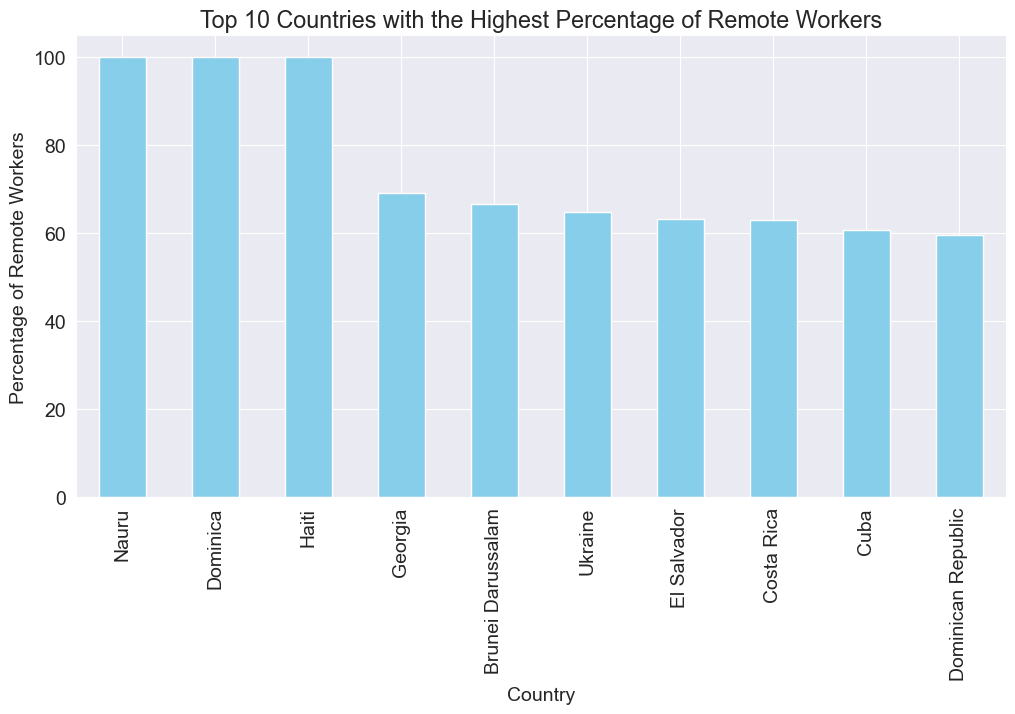

Country
Nauru                 100.000000
Dominica              100.000000
Haiti                 100.000000
Georgia                69.148936
Brunei Darussalam      66.666667
Ukraine                64.857784
El Salvador            63.157895
Costa Rica             62.962963
Cuba                   60.869565
Dominican Republic     59.574468
Name: Remote_Work_Percentage, dtype: float64

In [117]:
# top 10 countries with the highest percentage of remote workers - assuming "Remote" and "Hybrid" are considered as remote work

# First, we'll create a new column indicating whether the respondent works remotely
df['IsRemote'] = df['RemoteWork'].apply(lambda x: 1 if x in ['Remote', 'Hybrid'] else 0)

# Group by 'Country' and calculate the percentage of remote workers
remote_by_country = df.groupby('Country').agg(
    remote_workers=('IsRemote', 'sum'),
    total_respondents=('IsRemote', 'count')
)

# Calculate the percentage of remote workers in each country
remote_by_country['Remote_Work_Percentage'] = (remote_by_country['remote_workers'] / remote_by_country['total_respondents']) * 100

# Sort countries by the highest percentage of remote workers
remote_by_country_sorted = remote_by_country['Remote_Work_Percentage'].sort_values(ascending=False)

# Plot the countries with the highest percentage of remote workers
plt.figure(figsize=(12, 6))
remote_by_country_sorted.head(10).plot(kind='bar', color='skyblue')
plt.xlabel("Country")
plt.ylabel("Percentage of Remote Workers")
plt.title("Top 10 Countries with the Highest Percentage of Remote Workers")
plt.show()

# Display the top 10 countries with the highest percentage of remote workers
remote_by_country_sorted.head(10)

**The data shows the top 10 countries with the highest percentage of their developer population working remotely (including hybrid work). Nauru, Dominica, and Haiti have 100% remote work, though it's important to consider the sample size for these countries, as very small numbers can lead to skewed percentages. Georgia, Brunei Darussalam and Ukraine have significant percentages of remote workers. The Dominican Republic is the 10th country in the list, with nearly 60% of developers working remotely.**

### Q4 - Is there any relationship between the respondents age and education level?
To answer this question, we need to first understand the education distribution of the respondent using a barchart and then to check the relation between this feature, we can just use the group-by strategy

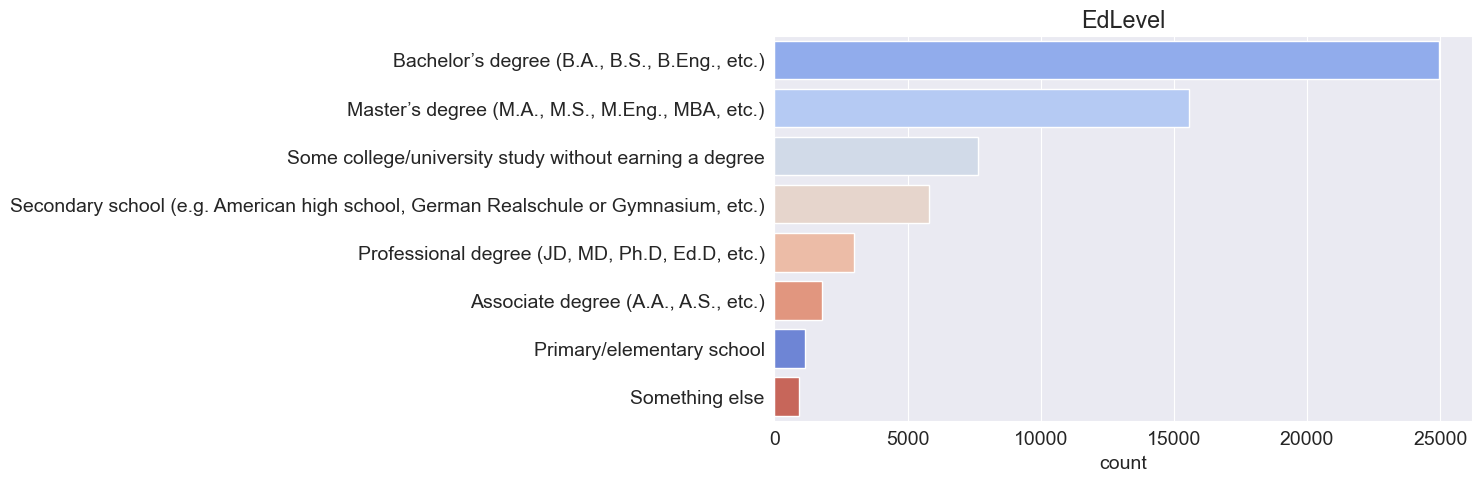

In [128]:
# What is the distribution of respondent's education level
order = survey_df.EdLevel.value_counts().index
sns.countplot(y=survey_df.EdLevel, order=order, hue=survey_df.EdLevel, palette='coolwarm', legend=False)
plt.title("EdLevel")
plt.ylabel(None)
plt.show();

**Based on the bar chart, the most common education level among respondents is a Bachelor's degree, followed by a Master's degree. A significant number of respondents also have some college or university study without earning a degree. Fewer respondents have higher-level degrees such as a Professional degree (JD, MD, Ph.D), or an Associate degree. The number of respondents with only primary or elementary school education or "something else" is relatively low.**

In [52]:
# correlation between education level and age of respondents
total_counts = survey_df.EdLevel.value_counts()
percentage_df = survey_df.groupby(['EdLevel', 'Age']).size().unstack().div(total_counts, axis=0) * 100
percentage_df

Age,18-24 years old,25-34 years old,35-44 years old,45-54 years old,55-64 years old,65 years or older,Prefer not to say,Under 18 years old
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",24.484105,32.292248,24.762967,10.819855,4.907975,1.450084,0.278862,1.003904
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21.846684,43.043862,21.790554,8.527784,3.524176,0.938177,0.236549,0.092214
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.672238,43.453108,31.471363,12.226008,4.621714,1.279167,0.250691,0.025712
Primary/elementary school,17.015707,9.336824,6.719023,2.705061,0.698080,0.698080,1.832461,60.994764
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2.727273,24.680135,36.565657,19.292929,10.505051,4.747475,1.111111,0.370370
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",47.747281,14.224064,8.717418,3.970309,1.726221,0.327982,0.621440,22.665286
Some college/university study without earning a degree,31.015554,28.715201,20.650895,11.671677,4.666057,1.346229,0.248334,1.686054
Something else,28.648069,25.214592,14.270386,6.223176,3.755365,1.716738,7.081545,13.090129


**Based on the cross-tabulation, here's a summary of the relationship between education level and age:**

Younger Age Groups (18-24, 25-34): A higher percentage of respondents in these age groups have Bachelor's degrees and some college education.

Middle Age Groups (35-44, 45-54): Master's degrees are more prevalent in these groups compared to younger respondents.

Older Age Groups (55-64, 65 or older): The percentage of respondents with a Bachelor's degree decreases, and there's a slightly higher representation of those with secondary school education.

**In general, the data suggests that younger respondents are more likely to have pursued Bachelor's degrees and some college, while Master's degrees become more common in middle age.**

### Q4b - We can try to gain further insight by checking if there is any relationship between Work experience and Education level
To answer this, we will can use compute correlation for this two features but first we need to encode the categorical feature to numerical feature

In [137]:
# Convert EdLevel to numerical codes
survey_df["EdLevel_encoded"] = survey_df["EdLevel"].astype("category").cat.codes

# Compute correlation
correlation = survey_df["EdLevel_encoded"].corr(survey_df["WorkExp"])
print(f"Correlation between Education Level and Work Experience: {correlation:.2f}")

Correlation between Education Level and Work Experience: 0.05


**A correlation of 0.05 between Education Level and Work Experience suggests almost no relationship between the two variables. This means that having a higher degree does not necessarily mean that a person has more work experience.**

#### But we can use a box plot to check for more pattern between this two features

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\2939603587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=survey_df, x="WorkExp", y="EdLevel", palette="coolwarm")


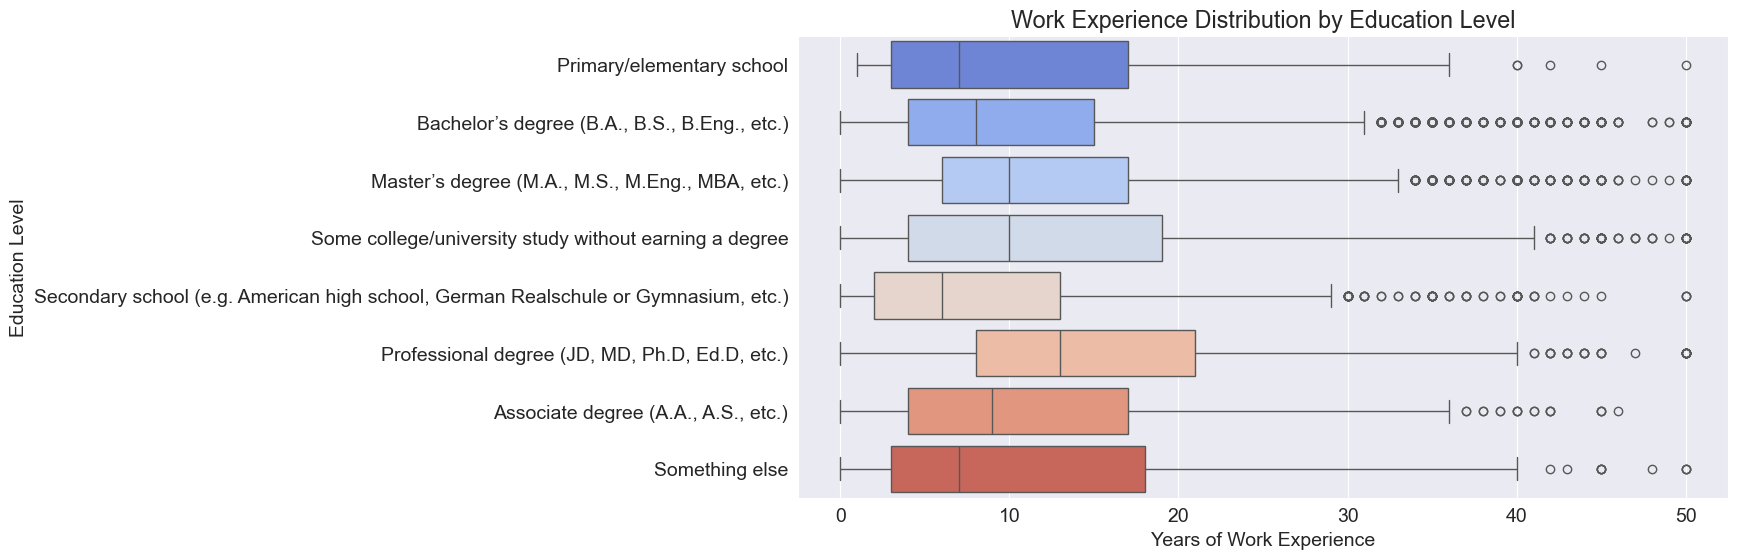

In [135]:
# vizulize the istribution of work experience for each education level.
plt.figure(figsize=(12, 6))
sns.boxplot(data=survey_df, x="WorkExp", y="EdLevel", palette="coolwarm")
plt.xlabel("Years of Work Experience")
plt.ylabel("Education Level")
plt.title("Work Experience Distribution by Education Level")
plt.show();

**Key Observations:**

**Professional Degrees: Those with professional degrees (JD, MD, Ph.D., etc.) show the highest median years of work experience.**
**Master's and Bachelor's Degrees: Respondents with Master's and Bachelor's degrees have a similar range of experience, with the median being around the 10-20 year mark.**
**Less Formal Education: As you move towards less formal education, such as "Some college/university study without earning a degree", "Secondary school", and "Primary/elementary school", the years of work experience tend to decrease.**

**Anomalies:There are some outliers, particularly in the "Professional degree" category, indicating individuals with advanced degrees who have a relatively low number of years of work experience.**

### Q5 - What is the proportion of respondents working in roles related to 'Data'
To answer this question, we need to first extract the work roles that have data-related keywords after which we can then calculate the percentage of this job role

In [63]:
# % of workers working in roles related to data science
data_related_keywords = ['Data', 'Machine', 'Database', 'Analyst', 'Science', 'Learning']

data_related_counts = dev_type_totals[dev_type_totals.index.str.contains('|'.join(data_related_keywords))]

# Sum the counts for data-related roles
total_data_related_count = data_related_counts.sum()

total_roles_count = dev_type_totals.sum()

# Calculate the percentage
percentage_data_related = (total_data_related_count / total_roles_count) * 100

print(f"The percentage of workers in roles related to data or machine is: {percentage_data_related:.2f}%")

The percentage of workers in roles related to data or machine is: 4.77%


**Only 4.77% of job roles are related to the data industry. This is a relatively small proportion compared to the total number of respondents. This could suggest that data-related roles are still a niche field among developers or that there is potential for growth as demand for data skills continues to rise in the industry.**

### Q6 - What is the most preferred employment type among developers? 

We can use a simple bar chart to vizualize the distribution of the remotework feature

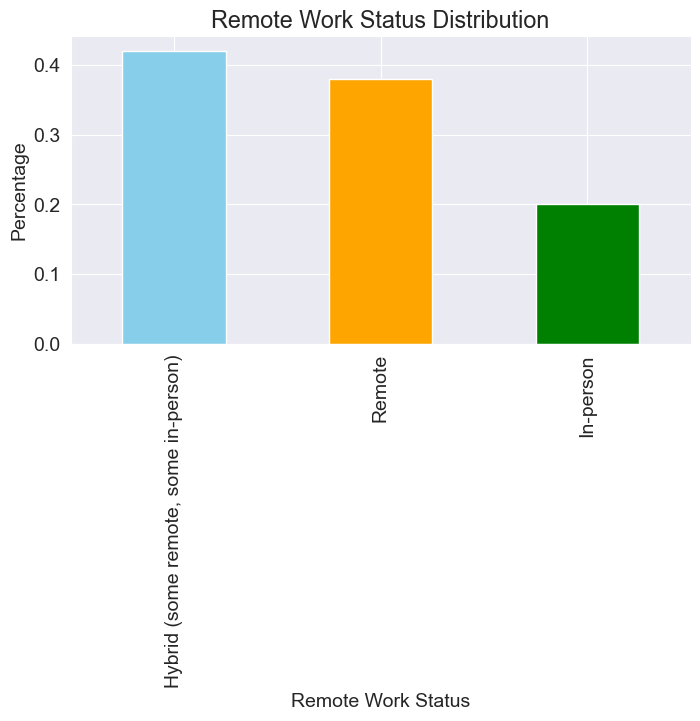

In [126]:
# What is the most Common Employment Status Among Developers?
#print(df["RemoteWork"].value_counts(normalize=True))
plt.figure(figsize=(8, 4))
df["RemoteWork"].value_counts(normalize=True).plot(kind="bar", color=["skyblue", "orange", "green"])
plt.xlabel("Remote Work Status")
plt.ylabel("Percentage")
plt.title("Remote Work Status Distribution")
plt.show();

**The data indicates that the largest portion of respondents (41.99%) work hybrid, meaning they work both remotely and in-person.  A slightly smaller percentage (38.01%) work fully remotely.  Just under 20% of respondents work exclusively in-person.  This shows that remote work, in some capacity, is the majority arrangement.**

### Q7 - What is the distribution of coding experience (in years) among survey respondents?
To answer this question, we need to convert the "less than 1 year" and "more than 50 years" values into numeric values, bin this values into groups of 10 and then plot the count for each bin.

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\952090310.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='YearsCode_Binned', data=df, palette="Set2")


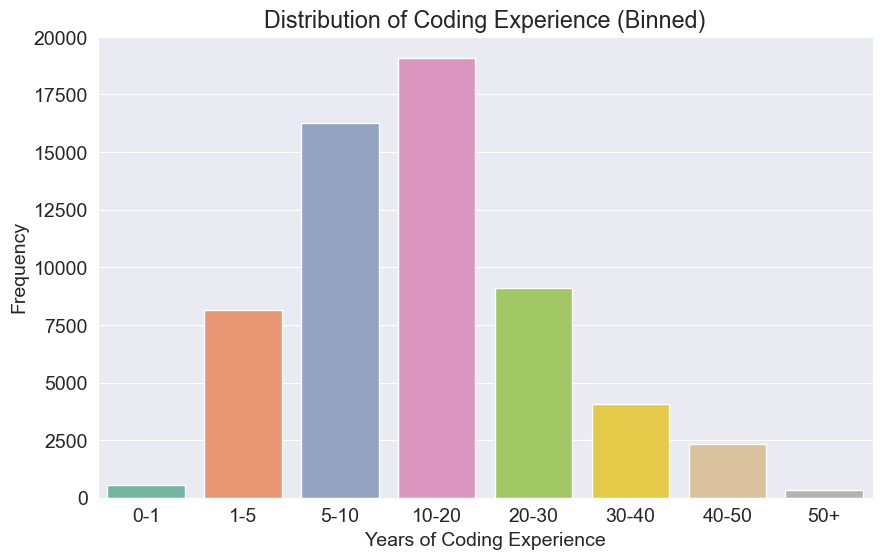

YearsCode_Binned
10-20    19096
5-10     16252
20-30     9095
1-5       8162
30-40     4051
40-50     2313
0-1        569
50+        331
Name: count, dtype: int64


In [127]:
# Convert "less than 1 year" and "more than 50 years" into numeric values
df["YearsCode"] = df["YearsCode"].replace({
    "Less than 1 year": 0,  # or we could use a small value like 0.1
    "More than 50 years": 50  # or any large value representing the 50+ range
})

# Ensure that all other "YearsCode" values are numeric
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors="coerce")

# Now we can proceed with binning
bins = [0, 1, 5, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-1', '1-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50+']

# Create a new column for the binned years of coding
df['YearsCode_Binned'] = pd.cut(df['YearsCode'], bins=bins, labels=labels, right=False)

# Plotting the count of each bin
plt.figure(figsize=(10, 6))
sns.countplot(x='YearsCode_Binned', data=df, palette="Set2")
plt.xlabel("Years of Coding Experience")
plt.ylabel("Frequency")
plt.title("Distribution of Coding Experience (Binned)")
plt.show();

print(df['YearsCode_Binned'].value_counts())

**The data shows the distribution of the respondents' years of coding experience, grouped into bins.  The largest group has 10 to 20 years of experience (19,096 respondents), followed by those with 5 to 10 years (16,252).  As the years of experience increase beyond 20 years, the number of respondents decreases.  Very few respondents have either very little experience (0-1 years) or a very large amount (50+ years).  This suggests that most respondents are experienced, mid-career professionals.**

### Q8 - What is the most common language developers use to code and which language is most likely to be acquired in the future years?
To answer this question, we need to create a function that splits the multiple values of the 'LanguageHaveWorkedWith' and 'LanguageWantToWorkWith' feature, do a count of each unique splitted value and then use a barchart to plot the count.

In [103]:
# Function to split multi-response columns
def split_multicolumn(col_series):
    """
    Splits a column containing multiple values separated by a delimiter (e.g., ';') 
    into a DataFrame where each unique option becomes a separate column.

    Parameters:
    col_series (pd.Series): A pandas Series containing multi-response values separated by ';'.

    Returns:
    pd.DataFrame: A DataFrame where each unique option is a column, and the values are 
                  True (if the option is present in the original entry) or False (if not).
    """
    # Extract unique options from the entire column
    options = set(option for sublist in col_series.dropna().str.split(";") for option in sublist)
    
    # Create a DataFrame where each option is a column with True/False values
    result_df = col_series.dropna().apply(lambda x: pd.Series([option in x for option in options], index=options))
    
    return result_df

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\224740229.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_language_used.values, y=top_language_used.index, palette="Blues_r")


<Figure size 1000x500 with 0 Axes>

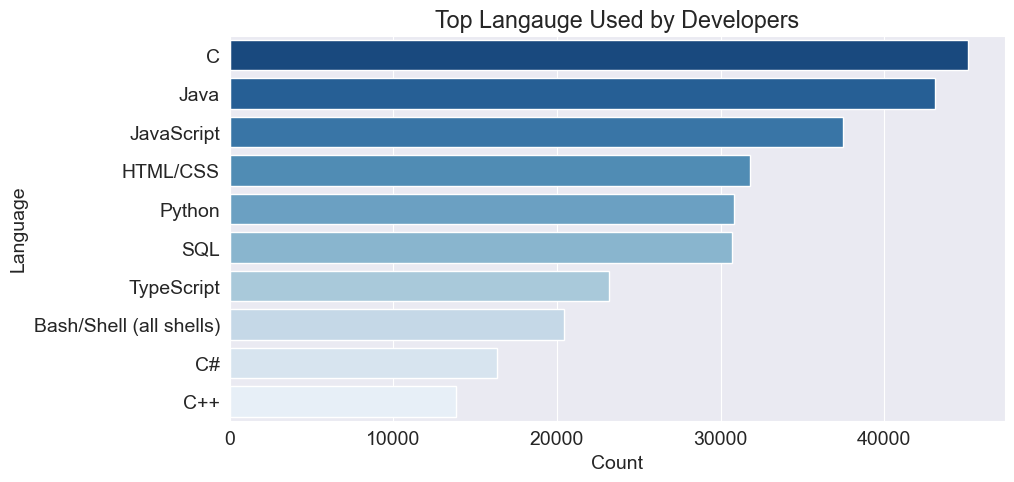

In [145]:
LanguageHaveWorkedWith_df = split_multicolumn(df["LanguageHaveWorkedWith"])

# Get the top 10 employment types
top_language_used = LanguageHaveWorkedWith_df.sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_language_used.values, y=top_language_used.index, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Language")
plt.title("Top Langauge Used by Developers")
plt.show();

**The chart indicates that C, Java, and JavaScript are the most frequently used languages. Python came in 5th which shows its relevance in the developer industry**

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\2684284131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_language_to_get.values, y=top_language_to_get.index, palette="Blues_r")


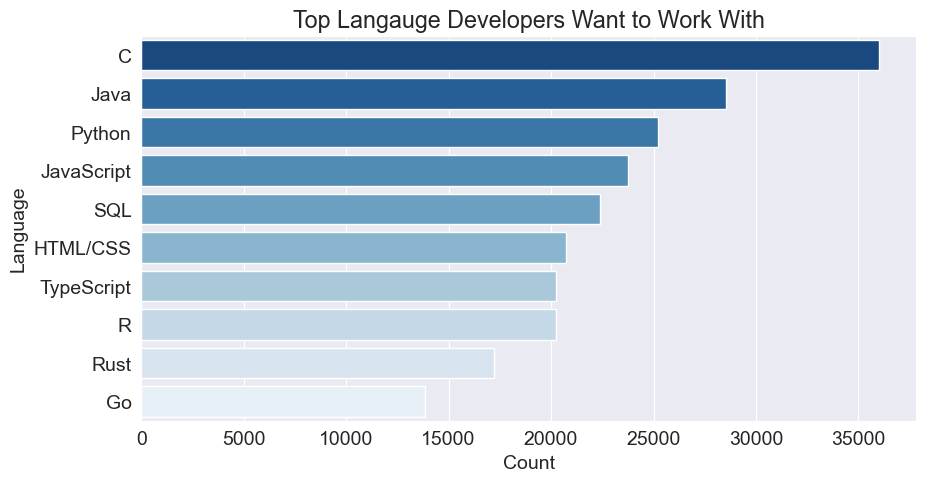

In [146]:
LanguageWantWantToWorkWith_df = split_multicolumn(df["LanguageWantToWorkWith"])

# Get the top 10 employment types
top_language_to_get = LanguageWantWantToWorkWith_df.sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_language_to_get.values, y=top_language_to_get.index, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Language")
plt.title("Top Langauge Developers Want to Work With")
plt.show();

**Python moved to the third desirable language to be acquired while C and Java are still holding the top position for languages developer willl like to work with in the future**

### Q9 - What are the most common developer roles and employment type in the industry?
we can answer this by using a bar chart to plot the count of the DevType and Employment features

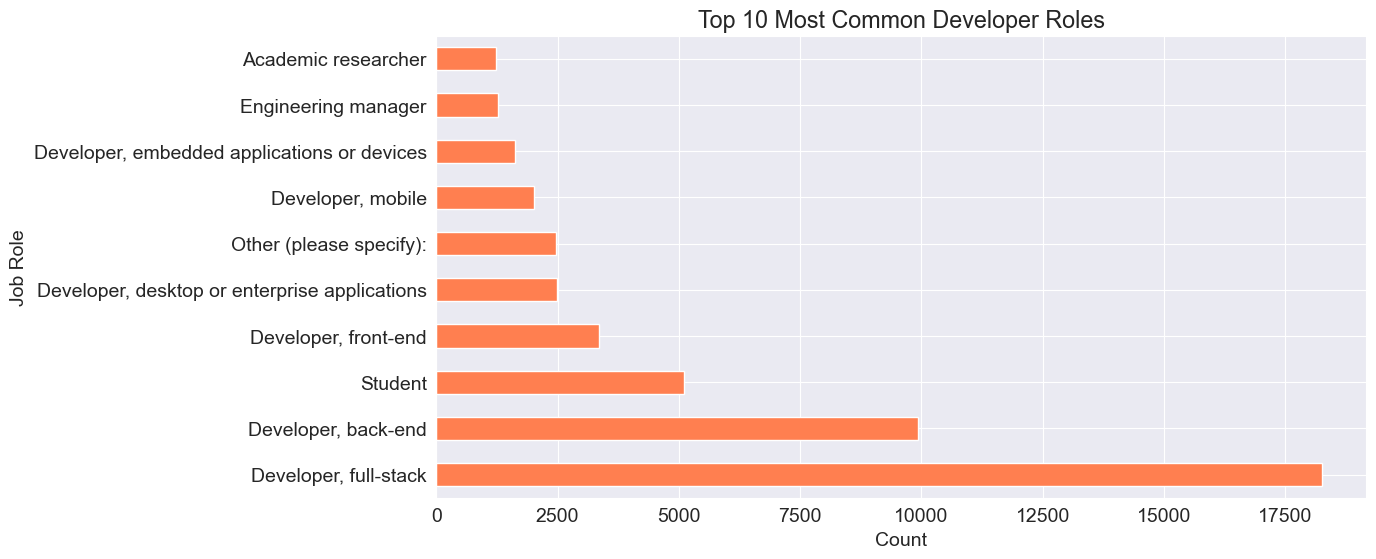

In [102]:
# visualize the devtype feature
plt.figure(figsize=(12, 6))
df["DevType"].value_counts().head(10).plot(kind="barh", color="coral")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.title("Top 10 Most Common Developer Roles")
plt.show();

**The chart clearly shows that "Developer, full-stack" is the most common role among the survey respondents. "Developer, back-end" and "Developer, front-end" are also quite common, with relatively high counts.Data-Related Roles:Unfortunately, from this specific chart, we cannot definitively identify roles that are explicitly data-related. "Academic researcher" and "Engineering manager" have the lowest counts among the roles shown.**

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\3227363684.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_employment.values, y=top_employment.index, palette="Blues_r")


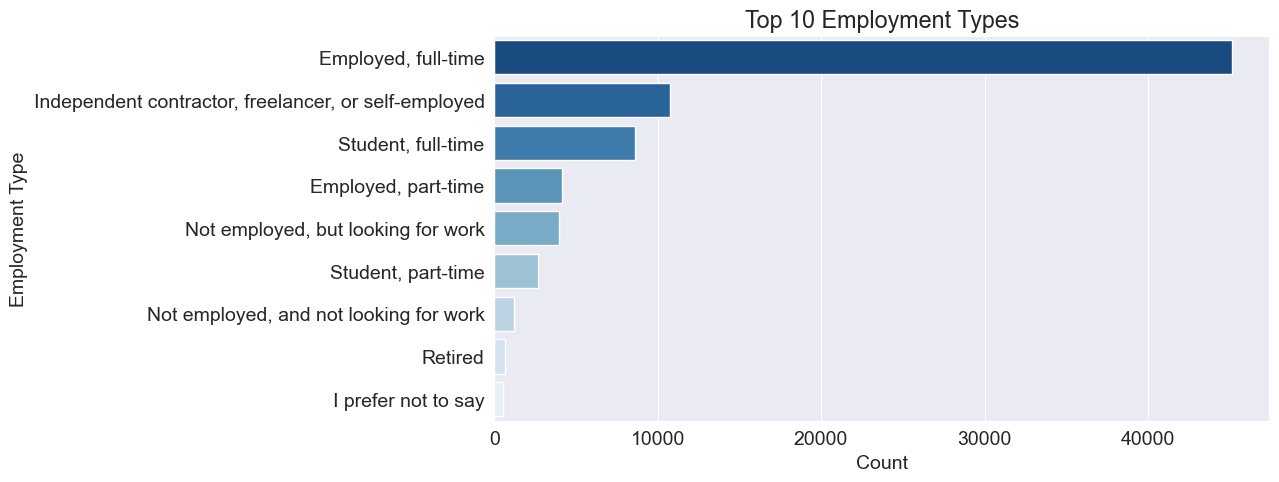

In [104]:
employment_df = split_multicolumn(df["Employment"])

# Get the top 10 employment types
top_employment = employment_df.sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_employment.values, y=top_employment.index, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Employment Type")
plt.title("Top 10 Employment Types")
plt.show();

**Most of the respondents are employed full time or independent contractors**

### Q10 - Do developers engage in any coding activity outside of work?
We need to split the multiple values of the 'CodingActivities' feature and then calculate the percentage of developers who engage in coding activities outside of work.

In [120]:
# Split the values in the 'CodingActivities' column (similar to what we did before)
coding_activities_split = split_multicolumn(df['CodingActivities'])

# Count the number of developers who engage in at least one coding activity outside of work
coding_activities_engaged = coding_activities_split.sum(axis=1).gt(0).sum()

# Calculate the percentage of developers who engage in coding activities outside of work
coding_activities_percentage = (coding_activities_engaged / df['CodingActivities'].notna().sum()) * 100

print(f"Total number of developers who engage in coding activities outside of work: {coding_activities_engaged}")
print(f"Percentage of developers who engage in coding activities outside of work: {coding_activities_percentage:.2f}%")

Total number of developers who engage in coding activities outside of work: 54466
Percentage of developers who engage in coding activities outside of work: 100.00%


**The result is 100%, it helps confirm a strong trend in the dataset. It highlights that all developers in the survey engage in coding activities outside of work, which is a significant finding about their passion for coding.**

### Q10b - WHat are the coding activity developers engage in outside of work?
We need to split the multiple values of the 'CodingActivities' feature and then calculate the percentage of developers who engage in coding activities outside of work.

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\2099305821.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coding_activities.values, y=top_coding_activities.index, palette="Purples_r")


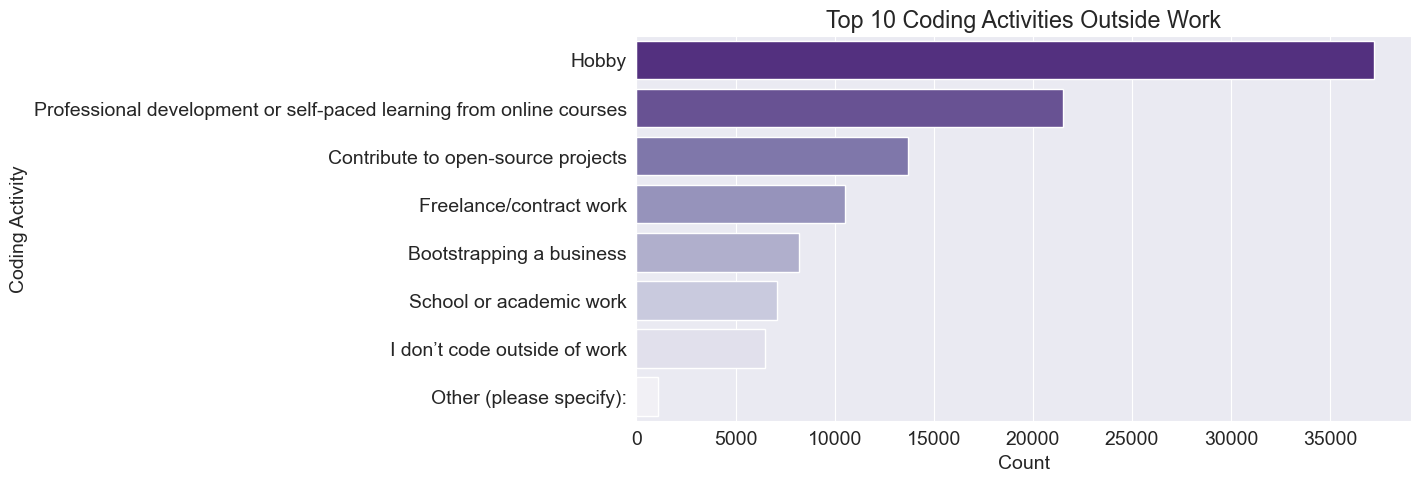

In [105]:
# What are the most common coding activities developers engage in outside of work?
coding_activities_df = split_multicolumn(df["CodingActivities"])

# Get the top 10 coding activities
top_coding_activities = coding_activities_df.sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_coding_activities.values, y=top_coding_activities.index, palette="Purples_r")
plt.xlabel("Count")
plt.ylabel("Coding Activity")
plt.title("Top 10 Coding Activities Outside Work")
plt.show();

**Hobby" is the most frequent response, with the highest count. This suggests that a significant portion of developers pursues coding for personal enjoyment.
"Professional development or self-paced learning from online courses" is also highly prevalent, indicating that many developers are dedicated to continuous learning and skill enhancement.**

### Q11 - What is the most common learning tool developers use?
First, we need to split the LearnCode feature and then vizualize the top 10 learning method using a barchart

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\1498057500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_learning_methods.values, y=top_learning_methods.index, palette="Greens_r")


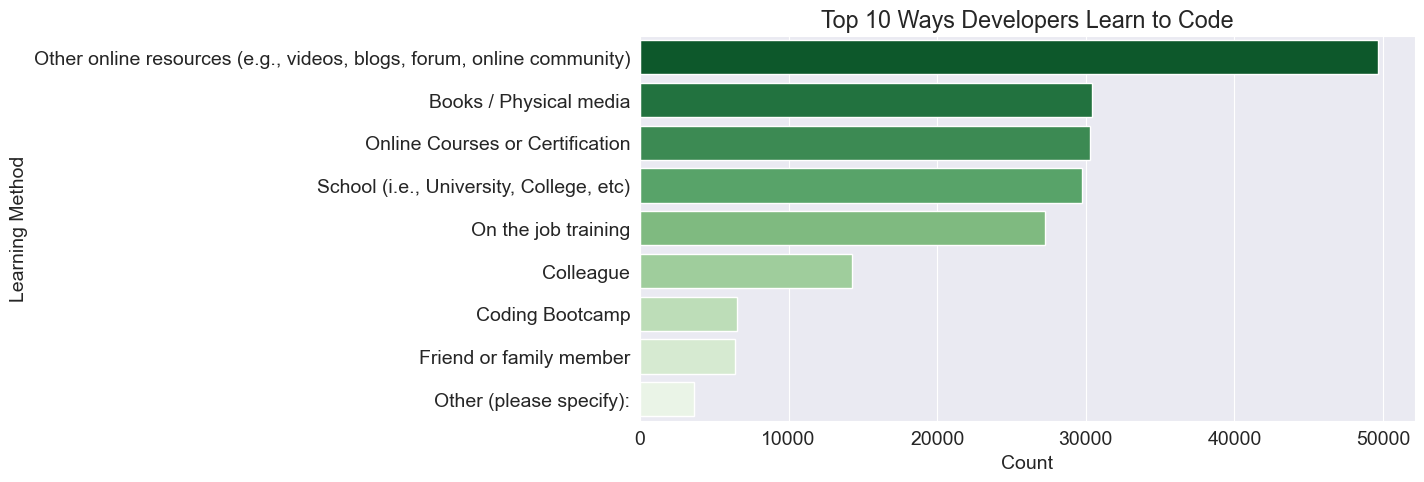

In [106]:
# Top 10 Ways Developers Learn to Code
learn_code_df = split_multicolumn(df["LearnCode"])

# Get the top 10 learning methods
top_learning_methods = learn_code_df.sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_learning_methods.values, y=top_learning_methods.index, palette="Greens_r")
plt.xlabel("Count")
plt.ylabel("Learning Method")
plt.title("Top 10 Ways Developers Learn to Code")
plt.show();

**Based on the bar chart, the most common way developers learn to code is through online resources. Formal/Schoola training ranked 4th**

### Q12 - How does work experience (WorkExp) correlate with job roles (DevType)?
we can answer this question by grouping the devtype feature by workexperience and then vizualizing this using a barplot

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\2045968586.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.values, y=top_roles.index, palette="coolwarm")


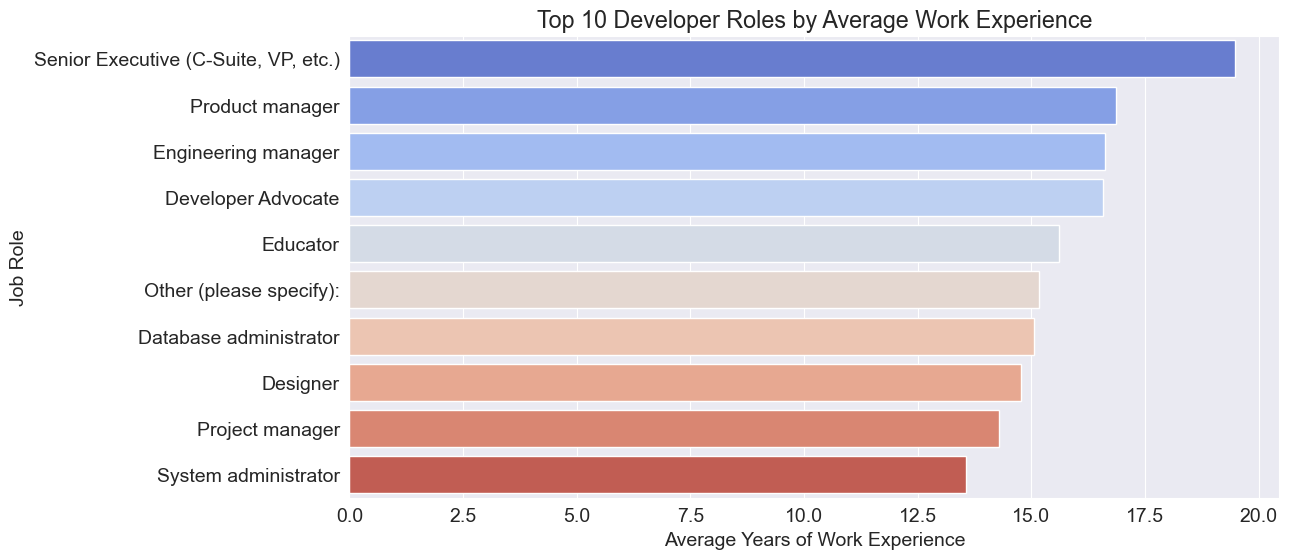

In [107]:
# How does work experience (WorkExp) correlate with job roles (DevType)?

# Group by DevType and calculate the average work experience
avg_workexp_by_role = df.groupby("DevType")["WorkExp"].mean().sort_values(ascending=False)

# Select the top 10 job roles with the highest average experience
top_roles = avg_workexp_by_role.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_roles.values, y=top_roles.index, palette="coolwarm")
plt.xlabel("Average Years of Work Experience")
plt.ylabel("Job Role")
plt.title("Top 10 Developer Roles by Average Work Experience")
plt.show();

***Experienced Roles: Senior executives, product managers, and engineering managers tend to have the highest average work experience.**

**Less Experienced Roles: System administrators and project managers generally have less work experience compared to the other roles in the chart.**

### Q13 - How does formal education level (EdLevel) correlate with coding experience (YearsCode)?
We can use a box plot to show the distribution of YearsCode across Education Levels

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\3831032455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='YearsCode', data=df, palette="Set2")


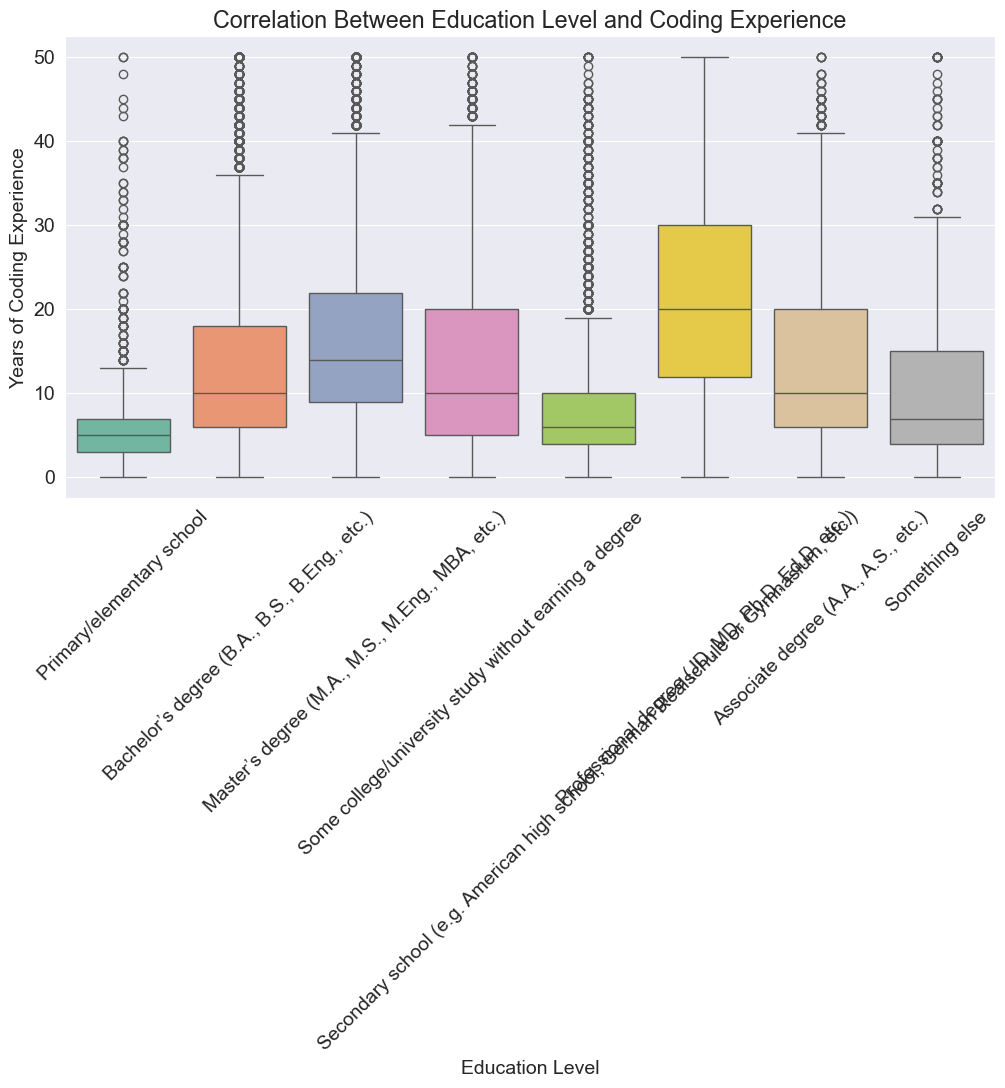

EdLevel
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        21.471190
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       16.601653
Some college/university study without earning a degree                                13.880239
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          13.756234
Associate degree (A.A., A.S., etc.)                                                   13.708875
Something else                                                                        11.106335
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8.371544
Primary/elementary school                                                              6.490600
Name: YearsCode, dtype: float64


In [118]:
# Plot a box plot to show the distribution of YearsCode across Education Levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='EdLevel', y='YearsCode', data=df, palette="Set2")
plt.xlabel("Education Level")
plt.ylabel("Years of Coding Experience")
plt.title("Correlation Between Education Level and Coding Experience")
plt.xticks(rotation=45)
plt.show()

# Calculate the mean years of coding experience for each education level
education_correlation = df.groupby('EdLevel')['YearsCode'].mean().sort_values(ascending=False)

print(education_correlation)

**The analysis shows that the most common educational levels among developers are professional degrees (21.47%), followed by master’s degrees (16.60%) and some college/university study without earning a degree (13.88%), with a noticeable drop for lower levels like secondary school (8.37%) and primary school (6.49%).**

### Q14 - What are the most common job roles among developers in different industries?
We answer this question by using groupby for the 'Industry' and 'DevType' features and then count the occurrences

In [121]:
# Group by 'Industry' and 'DevType' and count the occurrences
job_roles_by_industry = df.groupby(['Industry', 'DevType']).size().unstack(fill_value=0)
job_roles_by_industry

DevType,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
Industry,,,,,,,,,,,,,,,,,,,,,
Banking/Financial Services,1,5,22,55,34,31,4,0,49,1,...,2,52,10,11,13,3,15,15,2,9
Computer Systems Design and Services,10,3,28,18,10,20,5,3,22,2,...,2,37,4,4,29,1,8,14,10,19
Energy,7,1,6,30,10,19,1,0,14,1,...,0,21,2,3,12,9,1,2,1,6
Fintech,0,21,28,45,11,27,2,1,30,0,...,2,32,6,8,11,0,10,27,4,3
Government,16,0,10,24,21,23,5,2,20,3,...,0,43,7,13,27,29,14,5,6,22
Healthcare,19,0,19,51,24,36,4,0,30,0,...,1,45,6,9,26,13,3,18,6,8
Higher Education,256,1,7,5,6,15,3,0,7,1,...,1,25,3,5,25,19,3,4,14,30
Insurance,0,0,2,16,6,11,1,0,9,0,...,0,18,2,1,1,0,1,8,3,5
"Internet, Telecomm or Information Services",8,1,35,34,9,24,4,3,48,5,...,2,51,10,6,49,2,24,17,7,23


### Q14b - Specifically, what is the distribution of data-related job roles among developers in different industries?
First, we have to extract the data related job roles from all the job roles and then using group by to get the count of data related job roles and then finally use a stacked bar chart to display the distribution of the the data-related job roles across the different industries 

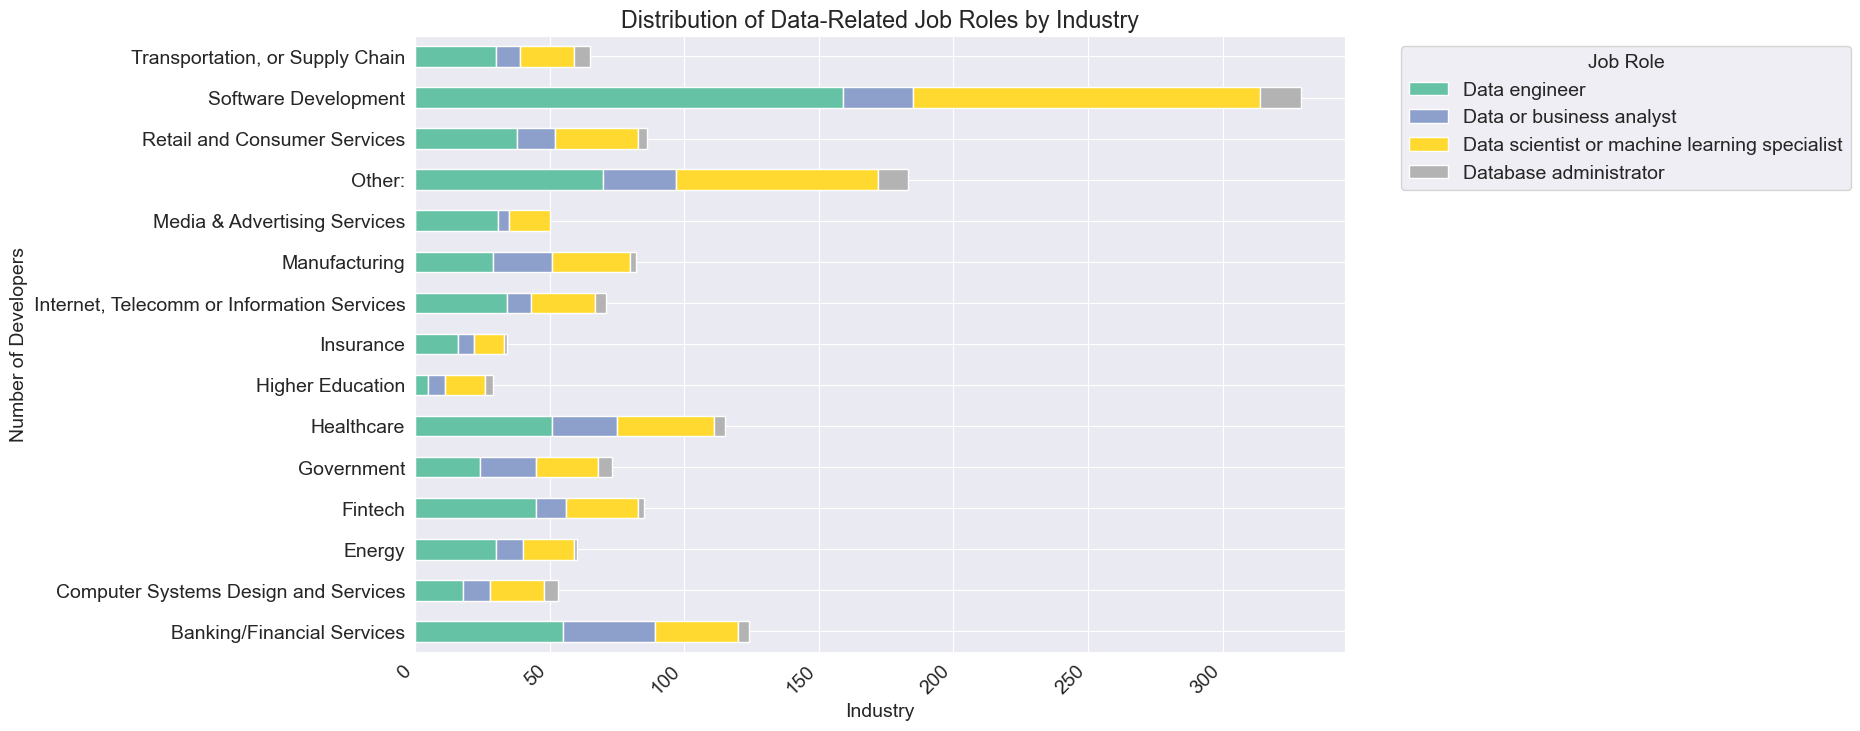

In [124]:
# Filter for job roles that contain 'data' or 'machine' in their name (case-insensitive)
data_roles_df = df[df['DevType'].str.contains('data|machine', case=False, na=False)]

# Group by 'Industry' and 'DevType' and count the occurrences of data-related job roles
data_roles_by_industry = data_roles_df.groupby(['Industry', 'DevType']).size().unstack(fill_value=0)

# Plot a stacked bar chart to show the distribution of data-related job roles across industries
data_roles_by_industry.plot(kind='barh', stacked=True, figsize=(12, 8), colormap="Set2")
plt.xlabel("Industry")
plt.ylabel("Number of Developers")
plt.title("Distribution of Data-Related Job Roles by Industry")
plt.xticks(rotation=45, ha="right")
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

**The chart illustrates the distribution of data-related job roles among developers across various industries.  In most industries, the majority of data-focused developers are Data Engineers, followed by Data or Business Analysts. Data Scientists or Machine Learning Specialists and Database Administrators make up smaller portions of the data-related roles across industries.**